# Project 2:  Holiday weather in Brasília

By Marcelo José Rovai, 11 May 2018

Based on project developed by Rob Griffiths, 11 September 2015, updated 11 April 2017, 18 October and 20 December 2017

This is the project notebook for the second part of The Open University's _Learn to code for Data Analysis_ course.

<p><img src="https://upload.wikimedia.org/wikipedia/commons/5/54/Montagem_Bras%C3%ADlia.jpg?raw=true"></p>
<br>
In this project as a brazilian, I am going to use the historic weather data from the Weather Underground for Brasilia,the main capital city of Brazil, trying to predict two good weather weeks to take off as holiday next year (2019). 

---

### NOTE: The data to be used is related to 2014, so this work is only a general guideline for chosing the best weeks to be in Brasilia

---

## Getting the data

Weather Underground keeps historical weather data collected in many airports around the world. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'LHR' in the 'Location' input box and when the pop up menu comes up with the option 'LHR, United Kingdom' select it and then click on 'Submit'. 

When the next page opens with London Heathrow data, click on the 'Custom' tab and select the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed further down the page. 

You can copy each month's data directly from the browser to a text editor like Notepad or TextEdit, to obtain a single file with as many months as you wish.

Weather Underground has changed in the past the way it provides data and may do so again in the future. 
Rob Griffiths have therefore collated the whole 2014 data in the provided 'Brasilia_2014.csv' file. 

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [1]:
ls

Brasilia.zip               brasiliaVacationMJR.ipynb
Brasilia_BSB_2014.csv*


In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
brasilia = read_csv('Brasilia_BSB_2014.csv', skipinitialspace=True)
brasilia.shape # 365 observations in 23 columns

(365, 23)

## Inspecting the data

In [3]:
brasilia.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,31,24,17,19,18,16,94,64,33,...,19,11,10,14,5,NaN,0.0,3.0,Thunderstorm,125<br />
1,2014-1-2,30,23,17,19,17,14,94,65,33,...,19,12,10,16,5,NaN,0.0,2.0,NaN,102<br />
2,2014-1-3,32,24,18,20,15,11,88,55,19,...,19,13,10,19,6,NaN,0.0,2.0,NaN,133<br />
3,2014-1-4,32,25,18,17,13,8,77,47,16,...,19,12,10,24,6,NaN,0.0,2.0,NaN,106<br />
4,2014-1-5,30,24,19,16,13,9,83,48,23,...,19,12,10,24,8,NaN,0.0,3.0,Rain,106<br />


In [4]:
brasilia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 23 columns):
Date                          365 non-null object
Max TemperatureC              365 non-null int64
Mean TemperatureC             365 non-null int64
Min TemperatureC              365 non-null int64
Dew PointC                    365 non-null int64
MeanDew PointC                365 non-null int64
Min DewpointC                 365 non-null int64
Max Humidity                  365 non-null int64
Mean Humidity                 365 non-null int64
Min Humidity                  365 non-null int64
Max Sea Level PressurehPa     365 non-null int64
Mean Sea Level PressurehPa    365 non-null int64
Min Sea Level PressurehPa     365 non-null int64
Max VisibilityKm              365 non-null int64
Mean VisibilityKm             365 non-null int64
Min VisibilitykM              365 non-null int64
Max Wind SpeedKm/h            365 non-null int64
Mean Wind SpeedKm/h           365 non-null int64
Max Gust Spe

### What must be done on a first sight:
- The Wind Direction column name will be renamed 
- Remove the  < br /> html line breaks from the values in the 'WindDirDegrees' column.
- Data on'WindDirDegrees'must be changed to numeric
- Date must be changed to numeric value
- Index must be replaced by 'Date'data

## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [5]:
brasilia = brasilia.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [6]:
brasilia['WindDirDegrees'] = brasilia['WindDirDegrees'].str.rstrip('<br />')

and change the values in the `'WindDirDegrees'` column to `float64`:

In [7]:
brasilia['WindDirDegrees'] = brasilia['WindDirDegrees'].astype('float64')   

We definitely need to change the values in the `'Date'` column into values of the `datetime64`  date type.

In [8]:
brasilia['Date'] = to_datetime(brasilia['Date'])

We also need to change the index from the default to the `datetime64` values in the `'GMT'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [9]:
brasilia.index = brasilia['Date']

In [10]:
brasilia.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,31,24,17,19,18,16,94,64,33,...,19,11,10,14,5,NaN,0.0,3.0,Thunderstorm,125.0
2014-01-02,2014-01-02,30,23,17,19,17,14,94,65,33,...,19,12,10,16,5,NaN,0.0,2.0,NaN,102.0
2014-01-03,2014-01-03,32,24,18,20,15,11,88,55,19,...,19,13,10,19,6,NaN,0.0,2.0,NaN,133.0
2014-01-04,2014-01-04,32,25,18,17,13,8,77,47,16,...,19,12,10,24,6,NaN,0.0,2.0,NaN,106.0
2014-01-05,2014-01-05,30,24,19,16,13,9,83,48,23,...,19,12,10,24,8,NaN,0.0,3.0,Rain,106.0


## Finding a pleasant weeks for vacation

Let's inspect the main statistics for some data related to Brasilia

In [11]:
temp = brasilia['Mean TemperatureC']
print ("Temp[0C]:", temp.min(), '==>', temp.max())

Temp[0C]: 16 ==> 28


In [12]:
hum = brasilia['Mean Humidity'] 
print ("Hum[%]:", hum.min(), '==>', hum.max())

Hum[%]: 26 ==> 88


Looks like temperature is OK. The problem seems to be the humidity (days with very low humidity) 

Best to see a graph of the temperature and humidity.

So next we tell Jupyter to display any graph created inside this notebook:

In [13]:
%matplotlib inline

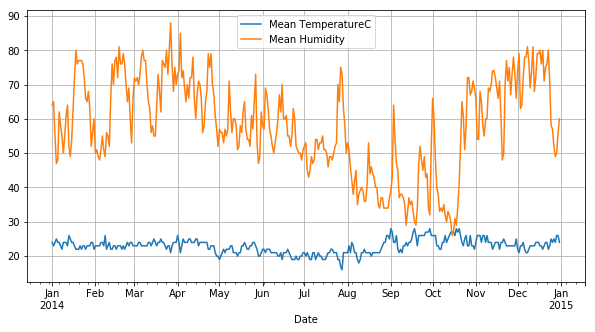

In [14]:
brasilia[['Mean TemperatureC', 'Mean Humidity']].plot(grid=True, figsize=(10,5))

Regarding humidity, seems that we must avoid august to november. Let's also take a look on previous months (noDrySeason) regarding rain  

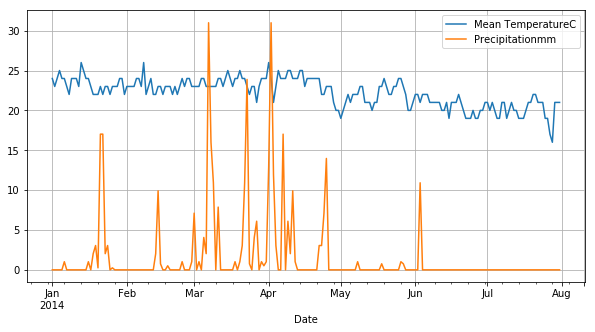

In [15]:
noDrySeason = brasilia.loc[datetime(2014,1,1) : datetime(2014,7,31)]
noDrySeason[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

May seems a fantastic month, with pleasant temperatures, average humidity and no rain at all! let's confirm:

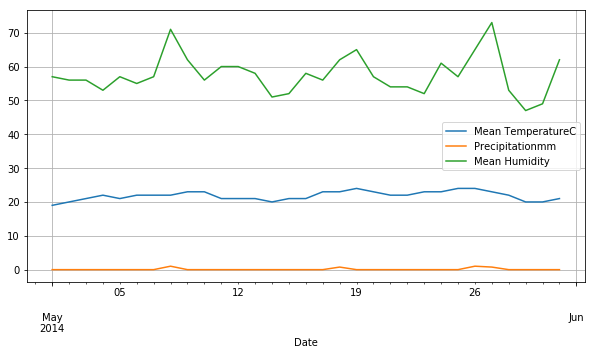

In [16]:
may = brasilia.loc[datetime(2014,5,1) : datetime(2014,5,31)]
may[['Mean TemperatureC', 'Precipitationmm', 'Mean Humidity']].plot(grid=True, figsize=(10,5))

Let's take a look on Dew PointC

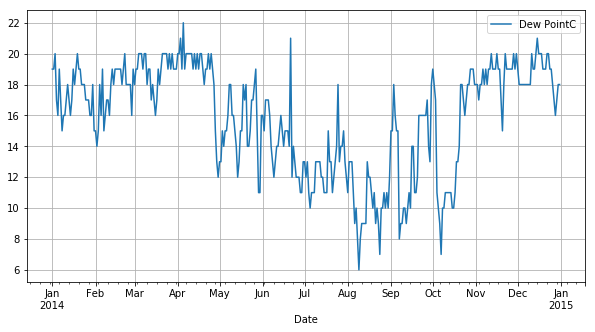

In [17]:
brasilia[['Dew PointC']].plot(grid=True, figsize=(10,5))

Most people are comfortable with a dew-point temperature of 16 degrees Celsius or lower. So, May seems really OK. 

## Conclusions

May is the best month to go to Brasilia! 

---